In [6]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import os
import pymc as pm


In [ ]:
data = np.loadtxt('data/chemical_rates.csv')

In [21]:
data

array([55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65, 51.49,
       51.86, 63.43, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48, 57.44,
       55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94,
       54.95, 50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82, 54.99,
       52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3 ,
       53.84, 53.16])

([<matplotlib.axis.YTick at 0x7cd6d833d810>], [Text(0, 0, '0')])

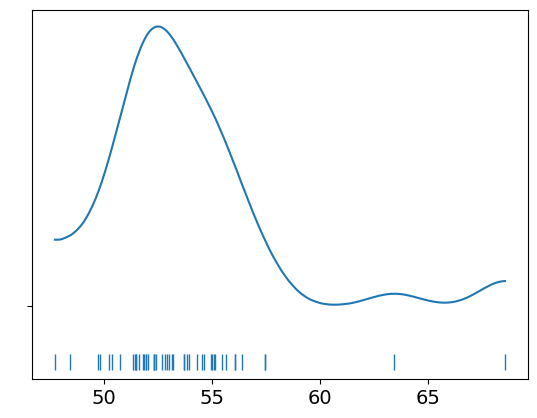

In [4]:
az.plot_kde(data, rug=True)
plt.yticks([0], alpha=0)

Output()

Output()

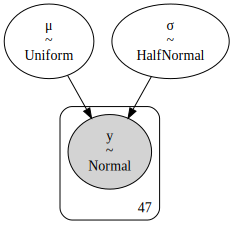

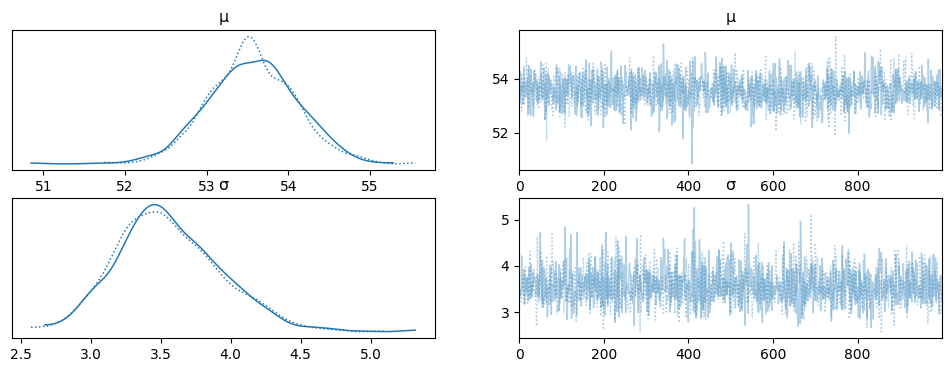

In [7]:
# Define the model
with pm.Model() as model_g:
    # Priors for the parameters
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.HalfNormal('σ', sigma=10)

    # Likelihood
    y = pm.Normal('y', mu=μ, sigma=σ, observed=data)

    # Sampling
    trace_g = pm.sample(draws=1000, tune=1000, return_inferencedata=True)

# Plot the trace
az.plot_trace(trace_g)

# Generate a graphical representation of the model
pm.model_to_graphviz(model_g)


In [13]:
trace_g

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

#### Pairplot for Correlations

pairplot of the parameters to ensure that there are no correlations that would adversely affect the sampling process

<Axes: xlabel='μ', ylabel='σ'>

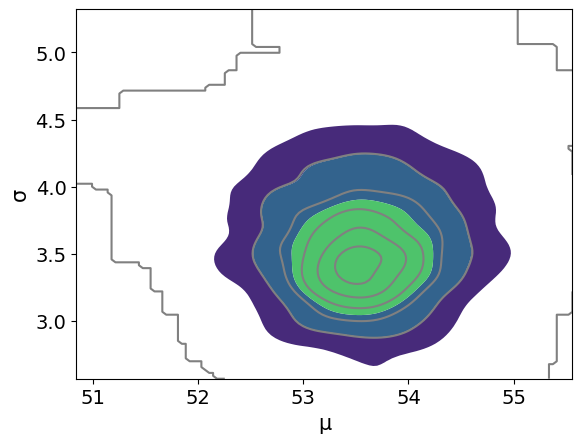

In [14]:
az.plot_pair(trace_g, kind='kde')

In [15]:
az.summary(trace_g)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,53.554,0.533,52.633,54.595,0.013,0.009,1703.0,1271.0,1.0
σ,3.558,0.374,2.870,4.235,0.009,0.007,1751.0,1448.0,1.0


#### Posterior Predictive Check

We can draw samples from the inferred posterior distribution to check to see how they line up with the observed values. Below, we draw 100 samples of length corresponding to that of the data from this posterior. You are returned a dictionary for each of the observed variables in the model.

In [16]:
y_pred_g = pm.sample_posterior_predictive(trace_g, model=model_g)

Output()

In [17]:
y_samples = y_pred_g.posterior_predictive['y']
print(y_samples)

<xarray.DataArray 'y' (chain: 2, draw: 1000, y_dim_2: 47)> Size: 752kB
array([[[49.69674795, 57.11666301, 50.37368191, ..., 54.49529926,
         50.12940356, 55.8974397 ],
        [43.17791694, 54.85868301, 55.56357927, ..., 54.97783946,
         55.21929785, 51.74391963],
        [49.48832007, 51.13897861, 47.78388616, ..., 52.43261307,
         50.42903874, 52.07956161],
        ...,
        [50.22710981, 52.19612226, 52.78448665, ..., 53.21710228,
         49.96214184, 47.93704229],
        [51.14463356, 50.20375288, 47.53929076, ..., 57.13717814,
         49.5076499 , 50.93138695],
        [53.03267896, 52.59652665, 54.10508451, ..., 57.61692562,
         60.37915901, 56.29268571]],

       [[57.15665187, 49.91315289, 60.21737054, ..., 56.62361522,
         56.23042211, 54.3673222 ],
        [59.60430704, 50.51937647, 52.11097259, ..., 60.62267297,
         57.75268121, 55.31787069],
        [54.16705376, 52.38009949, 56.76456163, ..., 51.60666517,
         56.91397797, 52.1552012

#Posterior Predictive Check plot

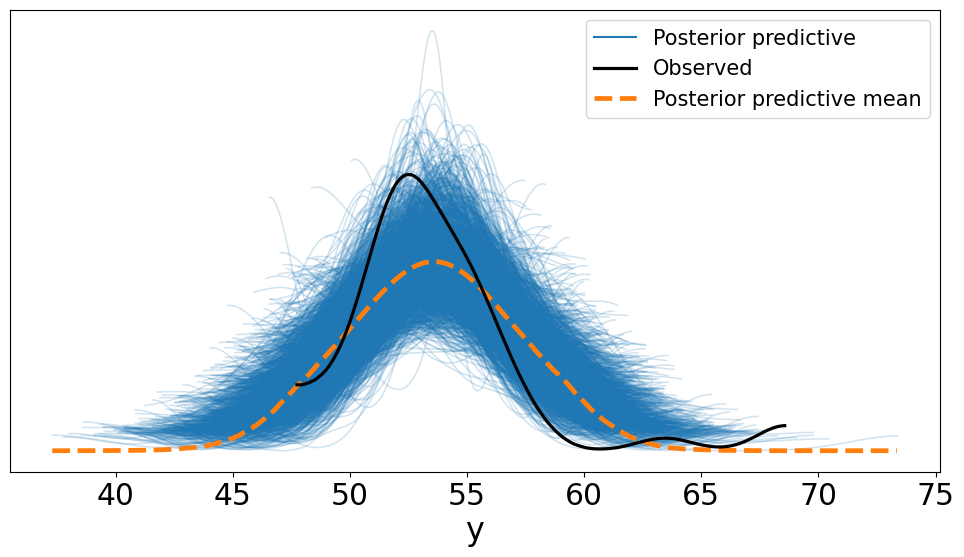

In [18]:
# Directly use y_pred_g in plot_ppc
ax = az.plot_ppc(y_pred_g, figsize=(12, 6), mean=True)

# Improve legend visibility
if isinstance(ax, np.ndarray):  # az.plot_ppc() returns an array of axes
    ax[0].legend(fontsize=15)
else:
    ax.legend(fontsize=15)

plt.show()